# Deep Learning 5주차 세션 과제

### 과제1) 모두의딥러닝 시즌2 강의의 longsequence 코드 lstm 모델 적용해보기

In [1]:
import torch
import torch.optim as optim
import numpy as np

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [3]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [4]:
# make dictionary
char_set = list(set(sentence))
char_dic = {c: i for i, c in enumerate(char_set)} # index를 key로 알파벳을 valueㄹ 갖는 딕셔너리 생성
char_dic

{'.': 0,
 ' ': 1,
 'n': 2,
 'r': 3,
 ',': 4,
 'c': 5,
 'l': 6,
 'u': 7,
 'y': 8,
 'a': 9,
 'm': 10,
 't': 11,
 'd': 12,
 'i': 13,
 'h': 14,
 'g': 15,
 'f': 16,
 'p': 17,
 'b': 18,
 "'": 19,
 'w': 20,
 'e': 21,
 'k': 22,
 'o': 23,
 's': 24}

In [5]:
# hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic) 
sequence_length = 10  # window size, 10글자씩 사용할래
learning_rate = 0.1

In [6]:
# data setting
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length): # 가져올 수 있는 chunk의 개수
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1] 
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str]) # string을 index로 만들어 넣어준다
    y_data.append([char_dic[c] for c in y_str])

x_one_hot = [np.eye(dic_size)[x] for x in x_data] # one-hot encoding

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [7]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [8]:
# declare LSTM + FC
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

net = Net(dic_size, hidden_size, 2)

In [9]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [10]:
# start training
for i in range(100): 
    optimizer.zero_grad() 
    outputs = net(X)
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1)) 
    loss.backward() # gradient 계산
    optimizer.step() # parameter 업데이트

    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        # print(i, j, ''.join([char_set[t] for t in result]), loss.item())
        if j == 0: 
            predict_str += ''.join([char_set[t] for t in result])
        else: # result의 맨 마지막 값만 가져와 기존의 prediction string에 붙여주기
            predict_str += char_set[result[-1]]

    print(predict_str)

                                                                                                                                                                                   
                                                                                                                                                                                   
tlt      tt       tt      t           ttt            tttt         ttt                     tt    t               tt     tttt    ttt   tt      ttt     tt           tt           t   
                                                                                                                                                                                   
                                                                                                                                                                                   
                                        t            t  tt  t t                                     

potodutonthto duild d thip, dosdt aopm tp ppnphento ethem to dollent dons dnt d ndt assis tthem tosksidnt donks dut pnthem tonsh them to do d tot toerens ens piienshty dt thereeps
noton lond do duild d thip, dondt aorm tp peaplentoeemher to dollent do s dnd dondt assig dthem tosks dnd do ks dut rethem toash ther to do d tor toerend ens pi ensity df thereeps
noton lond do duild d thip, dondt aorm tp peanlento ether to dollent dood dnd dondt ansig dther tonks dnd dorks dut rother toash ther to dord for therend ens pimensity af thereeps
notor wondhdo duild d thip, don't do m tp peoplenth ether th dollent dood dnd don't dssig dthem thsks dnd dork, dut rother thash ther th dor' for therend ens iimenshty af thereips
nosor londhth dutld d thip, dor't ao m tp penplenth ether to dollent do d dnd dor't asskg dther tank, dnd dork, dut pether toash ther ta do d for toerend ens phmensity af thereeps
nlsor lont to duild d ship, dor't aoum tp pecplento ether to dollent dond dnd dor't assigndthem tosk

t dou want to build a ship, don't drum up people together to collect wood and don't dssign them tasks and work, but rather teach them to long for the endless immensity of the sea.
t dou want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
t dou want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
t dou want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
t dou want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
t you want to build a ship, don't drum up people together to collect wood and don't assign them task

### 과제2)  
https://tutorials.pytorch.kr/intermediate/char_rnn_classification_tutorial.html 따라해보기!

18개 언어로 된 수천 개의 성(姓)을 훈련시키고, 철자에 따라 이름이 어떤 언어인지 예측

In [11]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

In [12]:
def findFiles(path): return glob.glob(path)

In [29]:
print(findFiles('C:/Users/njj06/Desktop/data/names/*.txt'))

['C:/Users/njj06/Desktop/data/names\\Arabic.txt', 'C:/Users/njj06/Desktop/data/names\\Chinese.txt', 'C:/Users/njj06/Desktop/data/names\\Czech.txt', 'C:/Users/njj06/Desktop/data/names\\Dutch.txt', 'C:/Users/njj06/Desktop/data/names\\English.txt', 'C:/Users/njj06/Desktop/data/names\\French.txt', 'C:/Users/njj06/Desktop/data/names\\German.txt', 'C:/Users/njj06/Desktop/data/names\\Greek.txt', 'C:/Users/njj06/Desktop/data/names\\Irish.txt', 'C:/Users/njj06/Desktop/data/names\\Italian.txt', 'C:/Users/njj06/Desktop/data/names\\Japanese.txt', 'C:/Users/njj06/Desktop/data/names\\Korean.txt', 'C:/Users/njj06/Desktop/data/names\\Polish.txt', 'C:/Users/njj06/Desktop/data/names\\Portuguese.txt', 'C:/Users/njj06/Desktop/data/names\\Russian.txt', 'C:/Users/njj06/Desktop/data/names\\Scottish.txt', 'C:/Users/njj06/Desktop/data/names\\Spanish.txt', 'C:/Users/njj06/Desktop/data/names\\Vietnamese.txt']


In [30]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# 유니코드 문자열을 ASCII로 변환
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

Slusarski


In [31]:
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [32]:
# 각 언어별 이름 목록 사전 category_lines 생성: {language: [names...]} 언어를 이름에 mapping
category_lines = {}
all_categories = []

In [33]:
# 파일을 읽고 줄 단위로 분리
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

In [34]:
print(category_lines['Italian'][:5])  # category_lines 확인해보기

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [43]:
# 이름을 tensor로 변환해주자

import torch

# all_letters 로 문자의 주소 찾기, 예시 "a" = 0, "b" = 1, ...
def letterToIndex(letter):
    return all_letters.find(letter)

# 하나의 문자를 크기가 <1 x n_letters>인 tensor로 표현
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1 # one-hot encoding
    return tensor

# 단어를 만들기 위해 이름을 torch.Size([이름길이, 1, n_letters]) array로 변경
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J')) # 문자 J에 대한 원핫인코딩 결과
print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


---
이 구조에 따라서 모델을 만들어보자

![](https://i.imgur.com/Z2xbySO.png)

In [36]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        # 두 개의 선형 계층과 logsoftmax 계층
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [37]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
# 입력과 이전 은닉상태를 출력과 다음 은닉상태로 전달

In [38]:
input = lineToTensor('Albert')
# lineToTensor 함수를 이용해 문자 길이 입력
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)
# 출력은 해당 카테고리의 likelihood

tensor([[-2.8972, -2.9242, -2.9079, -2.8427, -2.8979, -2.9466, -2.8723, -3.0259,
         -2.9028, -2.9134, -2.8902, -2.9175, -2.8586, -2.8606, -2.7938, -2.8559,
         -2.9353, -2.8082]], grad_fn=<LogSoftmaxBackward>)


In [39]:
# likelihood가 가장 큰 언어와 번호 반환
def categoryFromOutput(output):
    top_n, top_i = output.topk(1) # 텐서의 가장 큰 값 및 주소
    category_i = top_i[0].item()     # 텐서에서 정수 값으로 변경
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Russian', 14)


In [40]:
# 학습 data(이름, 언어)를 얻는 빠른 방법
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)
    # category가 언어, line이 이름

category = Czech / line = Jelinek
category = English / line = Redding
category = Czech / line = Stary
category = Chinese / line = She
category = Greek / line = Gianakopulos
category = Portuguese / line = Souza
category = Arabic / line = Totah
category = Dutch / line = Vliert
category = Polish / line = Czajka
category = Japanese / line = Yanagi


In [41]:
criterion = nn.NLLLoss() # 손실함수
learning_rate = 0.005 # 너무 높으면 발산, 너무 낮으면 학습X

# 학습
def train(category_tensor, line_tensor): # 입력과 목표 tensor 생성
    hidden = rnn.initHidden()

    rnn.zero_grad() # 0으로 초기화된 은닉 상태 생성

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        # 각 문자 읽고 다음 문자 위한 은닉 상태 유지

    loss = criterion(output, category_tensor) # 최종 output과 목표값 비교
    loss.backward() # 역전파

    # 매개변수의 경사도에 학습률을 곱해서 그 매개변수의 값에 더합니다.
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)
    
    return output, loss.item() # 출력과 손실 반환

In [44]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# 도식화를 위한 손실 추적
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # iter 숫자, 손실, 이름, 추측 화면 출력
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # 현재 평균 손실을 전체 손실 리스트에 추가
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 30s) 4.3514 Santillian / Irish ✗ (Spanish)
10000 10% (1m 0s) 1.0085 Atherley / English ✓
15000 15% (1m 30s) 1.3317 Milligan / Irish ✓
20000 20% (2m 0s) 0.5974 O'Reilly / Irish ✓
25000 25% (2m 33s) 2.5474 Raske / Russian ✗ (Dutch)
30000 30% (3m 5s) 1.7190 Shirane / French ✗ (Japanese)
35000 35% (3m 37s) 0.0509 O'Ryan / Irish ✓
40000 40% (4m 9s) 0.2157 Antar / Arabic ✓
45000 45% (4m 42s) 1.0016 Rosa / Spanish ✓
50000 50% (5m 13s) 0.3901 Huynh / Vietnamese ✓
55000 55% (5m 46s) 0.0172 Chehlakovsky / Russian ✓
60000 60% (6m 17s) 1.4487 Kim / Korean ✗ (Vietnamese)
65000 65% (6m 49s) 0.8531 Mansour / Arabic ✓
70000 70% (7m 22s) 0.2270 Letsos / Greek ✓
75000 75% (7m 54s) 0.7774 Korycansky / Czech ✓
80000 80% (8m 25s) 1.5003 Flynn / Scottish ✗ (Irish)
85000 85% (8m 57s) 0.9593 Ha / Vietnamese ✗ (Korean)
90000 90% (9m 30s) 1.4862 Weasley / French ✗ (English)
95000 95% (10m 2s) 0.0421 Rudaski / Polish ✓
100000 100% (10m 34s) 0.3557 Yue / Chinese ✓


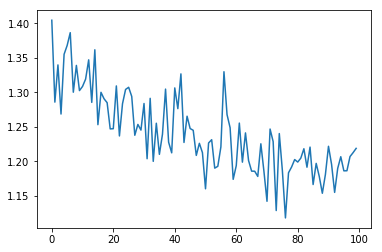

In [45]:
# 결과 도식화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

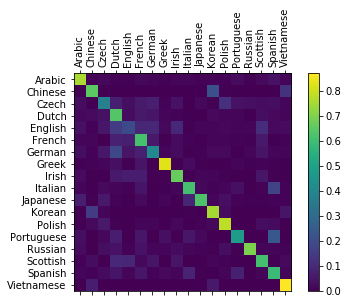

In [46]:
# 결과 평가
# 다른 언어에 얼마나 잘 작동하는지 보기 위해 모든 언어가 어떤 언어로 추측되는지 표현하는 confusion matrix 생성
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# 주어진 라인의 출력 반환
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# 예시들 중에 어떤 것이 정확하게 예측되었는지 기록
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# 모든 행을 합계로 나누어 정규화
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# 도식 설정
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# 축 설정
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# 모든 tick에서 레이블 지정
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()